### biblioteki

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_all.head()

,Unnamed: 0,Kod stacji_x,Nazwa stacji,Rok_x,Miesiąc_x,Dzień_x,Maksymalna temperatura dobowa [°C],Status pomiaru TMAX,Minimalna temperatura dobowa [°C],Status pomiaru TMIN,...,Kod stacji_y,Nazwa rzeki/jeziora,Rok_y,Miesiąc_y,Dzień_y,Stan wody [cm],Przepływ [m^3/s],Temperatura wody [st. C],Miesiąc kalendarzowy,Rok kalendarzowy
0,0,249180010,PSZCZYNA,2021,1,1,0.7,NaN,-1.6,NaN,...,149180220,Pszczynka (2116),2021,3,1,220,0.69,99.9,1,2021
1,1,249180010,PSZCZYNA,2021,1,2,3.9,NaN,-2.4,NaN,...,149180220,Pszczynka (2116),2021,3,2,219,0.68,99.9,1,2021
2,2,249180010,PSZCZYNA,2021,1,3,5.4,NaN,-0.4,NaN,...,149180220,Pszczynka (2116),2021,3,3,219,0.67,99.9,1,2021
3,3,249180010,PSZCZYNA,2021,1,4,6.4,NaN,-0.1,NaN,...,149180220,Pszczynka (2116),2021,3,4,222,0.87,99.9,1,2021
4,4,249180010,PSZCZYNA,2021,1,5,2.2,NaN,-0.6,NaN,...,149180220,Pszczynka (2116),2021,3,5,261,3.39,99.9,1,2021


Zmiana typu kolumny z object na date

In [3]:
data_all['Data'] = pd.to_datetime(data_all['Data'])
data_all = data_all.sort_values(by='Data')
data_all

,Unnamed: 0,Kod stacji_x,Nazwa stacji,Rok_x,Miesiąc_x,Dzień_x,Maksymalna temperatura dobowa [°C],Status pomiaru TMAX,Minimalna temperatura dobowa [°C],Status pomiaru TMIN,...,Kod stacji_y,Nazwa rzeki/jeziora,Rok_y,Miesiąc_y,Dzień_y,Stan wody [cm],Przepływ [m^3/s],Temperatura wody [st. C],Miesiąc kalendarzowy,Rok kalendarzowy
19591,19591,254170210,BORUCINO,2020,11,1,7.8,NaN,4.8,NaN,...,154170240,Borucinka (4868114),2021,1,1,251,0.100,99.9,11,2020
19109,19109,249200370,KROŚCIENKO,2020,11,1,11.5,NaN,0.7,NaN,...,149200160,Dunajec (214),2021,1,1,193,31.700,9.0,11,2020
19589,19589,254170210,BORUCINO,2020,11,1,7.8,NaN,4.8,NaN,...,154170190,Jez. Raduńskie Górne (4868119),2021,1,1,488,99999.999,9.9,11,2020
19440,19440,251160320,RADZYŃ,2020,11,1,12.1,NaN,7.1,NaN,...,151160250,Radzyńska Struga (15614),2021,1,1,118,99999.999,99.9,11,2020
19439,19439,251160320,RADZYŃ,2020,11,1,12.1,NaN,7.1,NaN,...,151160030,Jez. Sławskie (15619),2021,1,1,190,99999.999,11.5,11,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18584,18584,249190560,JABŁONKA,2023,10,31,16.4,NaN,7.5,NaN,...,149190250,Piekielnik (82224),2023,12,31,147,1.070,99.9,10,2023
18708,18708,249200930,PORONIN,2023,10,31,18.7,NaN,9.5,NaN,...,149200010,Poroniec (214128),2023,12,31,137,1.810,99.9,10,2023
18645,18645,249200370,KROŚCIENKO,2023,10,31,20.2,NaN,11.2,NaN,...,149200160,Dunajec (214),2023,12,31,192,31.300,12.4,10,2023
18925,18925,251160320,RADZYŃ,2023,10,31,14.4,NaN,11.1,NaN,...,151160250,Radzyńska Struga (15614),2023,12,31,125,0.039,99.9,10,2023


### Wybór kolumn i stacji (Pszczynka ma dość szeroki rozkład dla kolumny Stan wody) - mniej przewidywalna

In [69]:
data = data_all[['Nazwa stacji', 'Data', \
                'Maksymalna temperatura dobowa [°C]', 'Minimalna temperatura dobowa [°C]',\
               'Średnia temperatura dobowa [°C]', 'Temperatura minimalna przy gruncie [°C]', \
                'Suma dobowa opadów [mm]', 'Rodzaj opadu [S/W/]', 'Wysokość pokrywy śnieżnej [cm]',\
                'Nazwa rzeki/jeziora', 'Stan wody [cm]', 'Przepływ [m^3/s]', 'Temperatura wody [st. C]'\
               ]] \
            [data_all['Nazwa rzeki/jeziora'] == 'Pszczynka (2116)'] #wybor stacji


In [18]:
data.head()

,Nazwa stacji,Data,Maksymalna temperatura dobowa [°C],Minimalna temperatura dobowa [°C],Średnia temperatura dobowa [°C],Temperatura minimalna przy gruncie [°C],Suma dobowa opadów [mm],Rodzaj opadu [S/W/],Wysokość pokrywy śnieżnej [cm],Nazwa rzeki/jeziora,Stan wody [cm],Przepływ [m^3/s],Temperatura wody [st. C]
19019,PSZCZYNA,2020-11-01,11.6,0.4,5.6,-0.5,0.3,W,0,Pszczynka (2116),241,2.08,99.9
19020,PSZCZYNA,2020-11-02,15.0,6.7,11.4,4.9,1.7,W,0,Pszczynka (2116),244,2.29,99.9
19021,PSZCZYNA,2020-11-03,16.2,11.9,13.6,7.9,7.9,W,0,Pszczynka (2116),247,2.44,99.9
19022,PSZCZYNA,2020-11-04,13.7,8.3,10.5,8.3,7.0,W,0,Pszczynka (2116),255,2.95,99.9
19023,PSZCZYNA,2020-11-05,8.6,1.8,4.6,-0.9,0.0,NaN,0,Pszczynka (2116),261,3.38,99.9


In [19]:
data['Nazwa stacji'].drop_duplicates()

19019    PSZCZYNA
Name: Nazwa stacji, dtype: object

In [47]:
data.shape

(1095, 13)

In [48]:
data.describe()

,Maksymalna temperatura dobowa [°C],Minimalna temperatura dobowa [°C],Średnia temperatura dobowa [°C],Temperatura minimalna przy gruncie [°C],Suma dobowa opadów [mm],Wysokość pokrywy śnieżnej [cm],Stan wody [cm],Przepływ [m^3/s],Temperatura wody [st. C]
count,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1.095000e+03
mean,14.646027,4.769863,9.438630,2.474429,2.174977,0.817352,220.934247,0.845589,9.990000e+01
std,9.321511,6.970643,8.045077,7.420764,4.968292,3.420749,14.096924,0.849821,1.720299e-12
min,-6.800000,-18.900000,-12.600000,-22.100000,0.000000,0.000000,206.000000,0.150000,9.990000e+01
25%,6.700000,-0.600000,2.900000,-2.500000,0.000000,0.000000,213.000000,0.360000,9.990000e+01
50%,15.200000,4.900000,9.300000,2.000000,0.000000,0.000000,217.000000,0.530000,9.990000e+01
75%,22.300000,10.400000,16.400000,8.300000,2.100000,0.000000,223.000000,0.980000,9.990000e+01
max,33.300000,19.100000,25.300000,18.700000,62.200000,30.000000,334.000000,6.270000,9.990000e+01


### analiza wartości w kolumnach w połączonym zbiorze

In [20]:
data['Data'].isna().any()

False

In [21]:
data.sort_values(by=['Data'])['Data'].drop_duplicates()

19019   2020-11-01
19020   2020-11-02
19021   2020-11-03
19022   2020-11-04
19023   2020-11-05
           ...    
18518   2023-10-27
18519   2023-10-28
18520   2023-10-29
18521   2023-10-30
18522   2023-10-31
Name: Data, Length: 1095, dtype: datetime64[ns]

In [24]:
data['Data'].min()

Timestamp('2020-11-01 00:00:00')

In [23]:
data['Data'].max()

Timestamp('2023-10-31 00:00:00')

Maksymalna temperatura dobowa

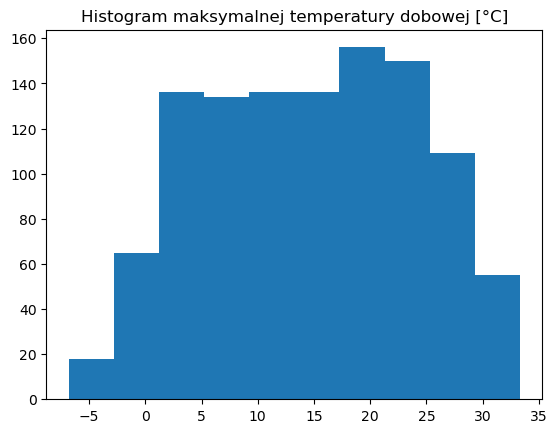

In [26]:
plt.hist(data['Maksymalna temperatura dobowa [°C]'])
plt.title('Histogram maksymalnej temperatury dobowej [°C]')
plt.show()

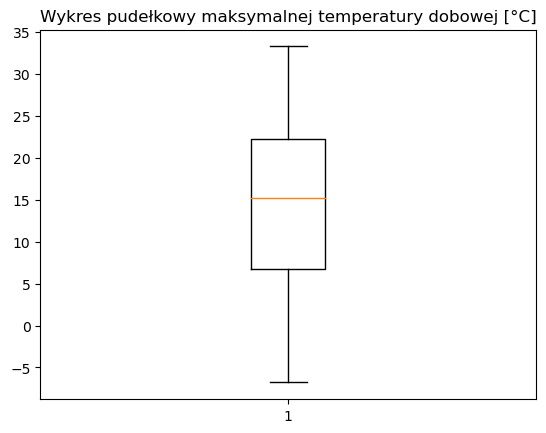

In [27]:
plt.boxplot(data['Maksymalna temperatura dobowa [°C]'])
plt.title('Wykres pudełkowy maksymalnej temperatury dobowej [°C]')
plt.show()

Minimalna temperatura dobowa

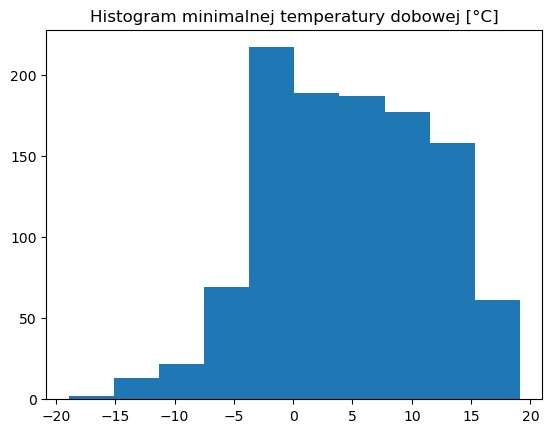

In [28]:
plt.hist(data['Minimalna temperatura dobowa [°C]'])
plt.title('Histogram minimalnej temperatury dobowej [°C]')
plt.show()

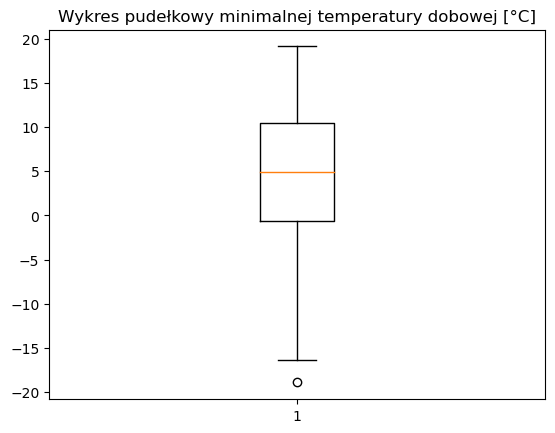

In [29]:
plt.boxplot(data['Minimalna temperatura dobowa [°C]'])
plt.title('Wykres pudełkowy minimalnej temperatury dobowej [°C]')
plt.show()

Średnia temperatura dobowa

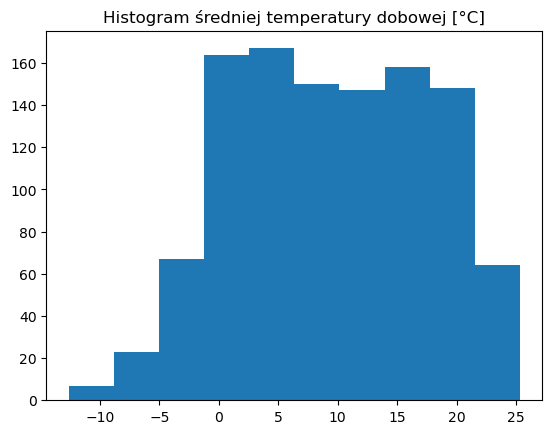

In [30]:
plt.hist(data['Średnia temperatura dobowa [°C]'])
plt.title('Histogram średniej temperatury dobowej [°C]')
plt.show()

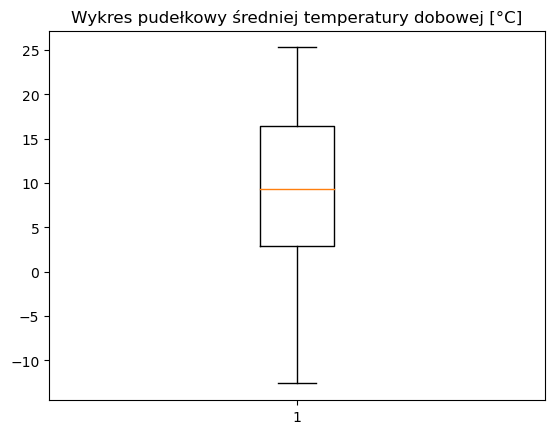

In [31]:
plt.boxplot(data['Średnia temperatura dobowa [°C]'])
plt.title('Wykres pudełkowy średniej temperatury dobowej [°C]')
plt.show()

Temperatura minimalna przy gruncie

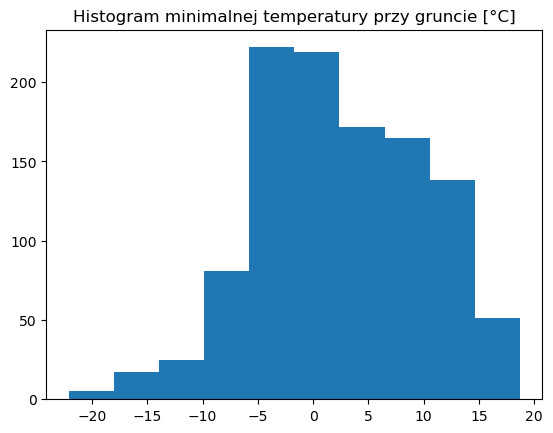

In [32]:
plt.hist(data['Temperatura minimalna przy gruncie [°C]'])
plt.title('Histogram minimalnej temperatury przy gruncie [°C]')
plt.show()

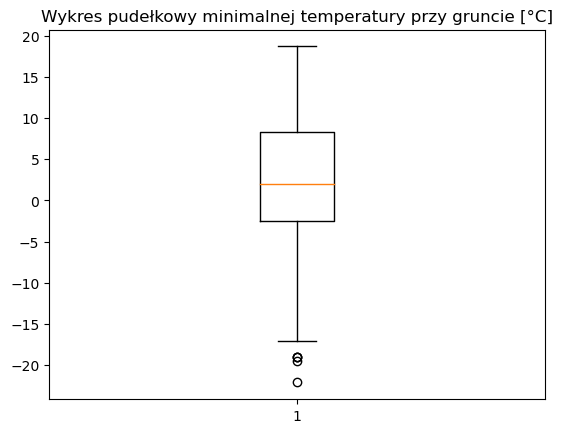

In [33]:
plt.boxplot(data['Temperatura minimalna przy gruncie [°C]'])
plt.title('Wykres pudełkowy minimalnej temperatury przy gruncie [°C]')
plt.show()

Suma dobowa opadów

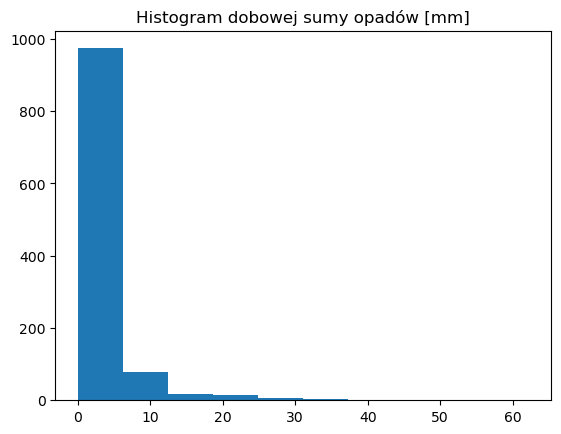

In [34]:
plt.hist(data['Suma dobowa opadów [mm]'])
plt.title('Histogram dobowej sumy opadów [mm]')
plt.show()

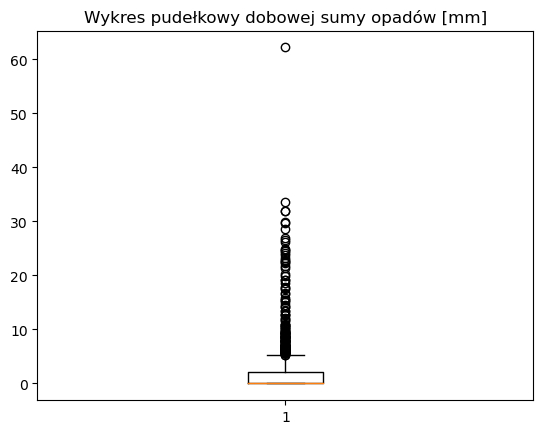

In [35]:
plt.boxplot(data['Suma dobowa opadów [mm]'])
plt.title('Wykres pudełkowy dobowej sumy opadów [mm]')
plt.show()

rodzaj opadu

In [36]:
data.groupby(['Rodzaj opadu [S/W/]']).count()

,Nazwa stacji,Data,Maksymalna temperatura dobowa [°C],Minimalna temperatura dobowa [°C],Średnia temperatura dobowa [°C],Temperatura minimalna przy gruncie [°C],Suma dobowa opadów [mm],Wysokość pokrywy śnieżnej [cm],Nazwa rzeki/jeziora,Stan wody [cm],Przepływ [m^3/s],Temperatura wody [st. C]
Rodzaj opadu [S/W/],,,,,,,,,,,,
S,128,128,128,128,128,128,128,128,128,128,128,128
W,422,422,422,422,422,422,422,422,422,422,422,422


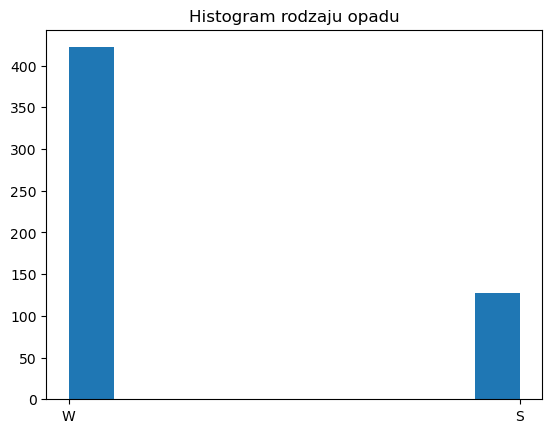

In [37]:
plt.hist(data['Rodzaj opadu [S/W/]'].dropna())
plt.title('Histogram rodzaju opadu')
plt.show()

In [38]:
data['Rodzaj opadu [S/W/]'].isna().sum()

545

Wysokość pokrywy śnieżnej

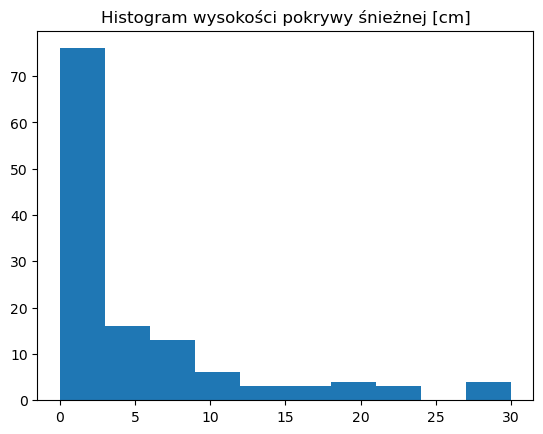

In [41]:
plt.hist(data['Wysokość pokrywy śnieżnej [cm]'][data['Rodzaj opadu [S/W/]'] == 'S'])
plt.title('Histogram wysokości pokrywy śnieżnej [cm] w dniach, kiedy występował opad śniegu')
plt.show()

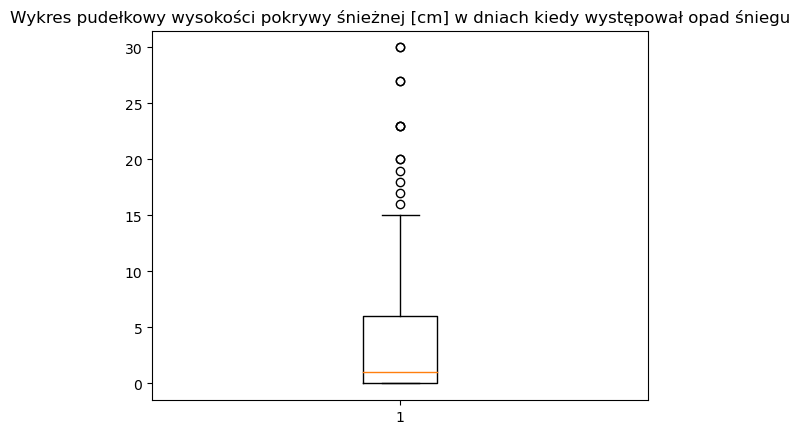

In [43]:
plt.boxplot(data['Wysokość pokrywy śnieżnej [cm]'][data['Rodzaj opadu [S/W/]'] == 'S'])
plt.title('Wykres pudełkowy wysokości pokrywy śnieżnej [cm] w dniach, kiedy występował opad śniegu')
plt.show()

Stan wody

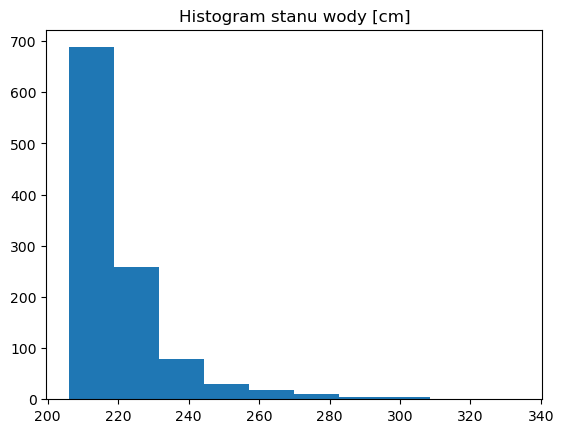

In [45]:
plt.hist(data['Stan wody [cm]'])
plt.title('Histogram stanu wody [cm]')
plt.show()

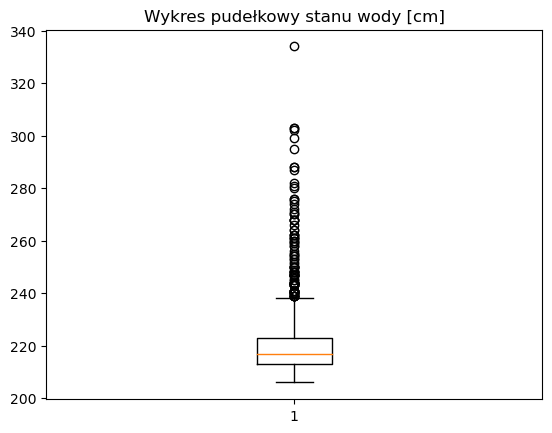

In [46]:
#widać, że jest wysokie odchylenie standardowe
plt.boxplot(data['Stan wody [cm]'])
plt.title('Wykres pudełkowy stanu wody [cm]')
plt.show()

Przepływ

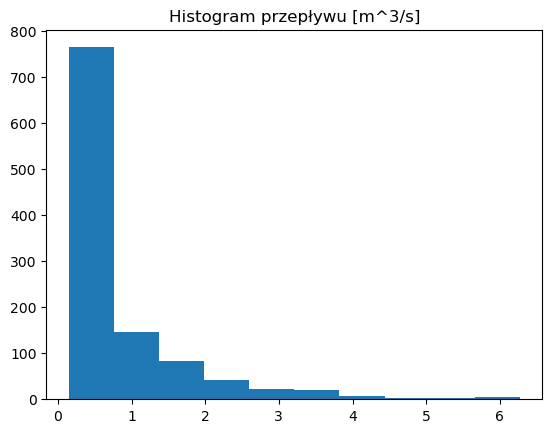

In [49]:
plt.hist(data['Przepływ [m^3/s]'])
plt.title('Histogram przepływu [m^3/s]')
plt.show()

Temperatura wody

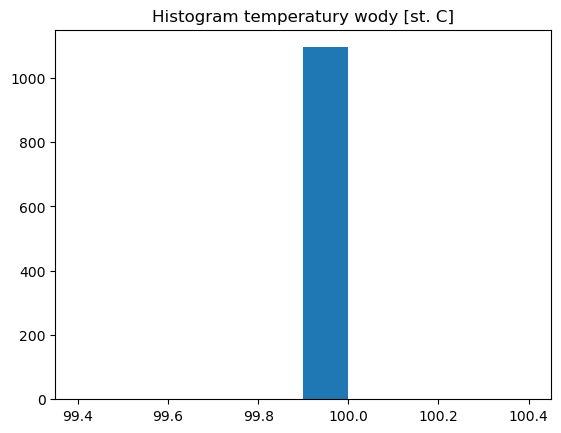

In [52]:
plt.hist(data['Temperatura wody [st. C]'])
plt.title('Histogram temperatury wody [st. C]')
plt.show()

In [53]:
data['Temperatura wody [st. C]'].drop_duplicates()
#w tym przypadku kolumna ta składa się z samych braków danych

19019    99.9
Name: Temperatura wody [st. C], dtype: float64

wyłączenie kolumny 'Temperatura wody [st. C]' ze zbioru w dalszych krokach analizy

In [70]:
data = data.loc[:, data.columns != 'Temperatura wody [st. C]']

#### sprawdzenie całościowe zbioru

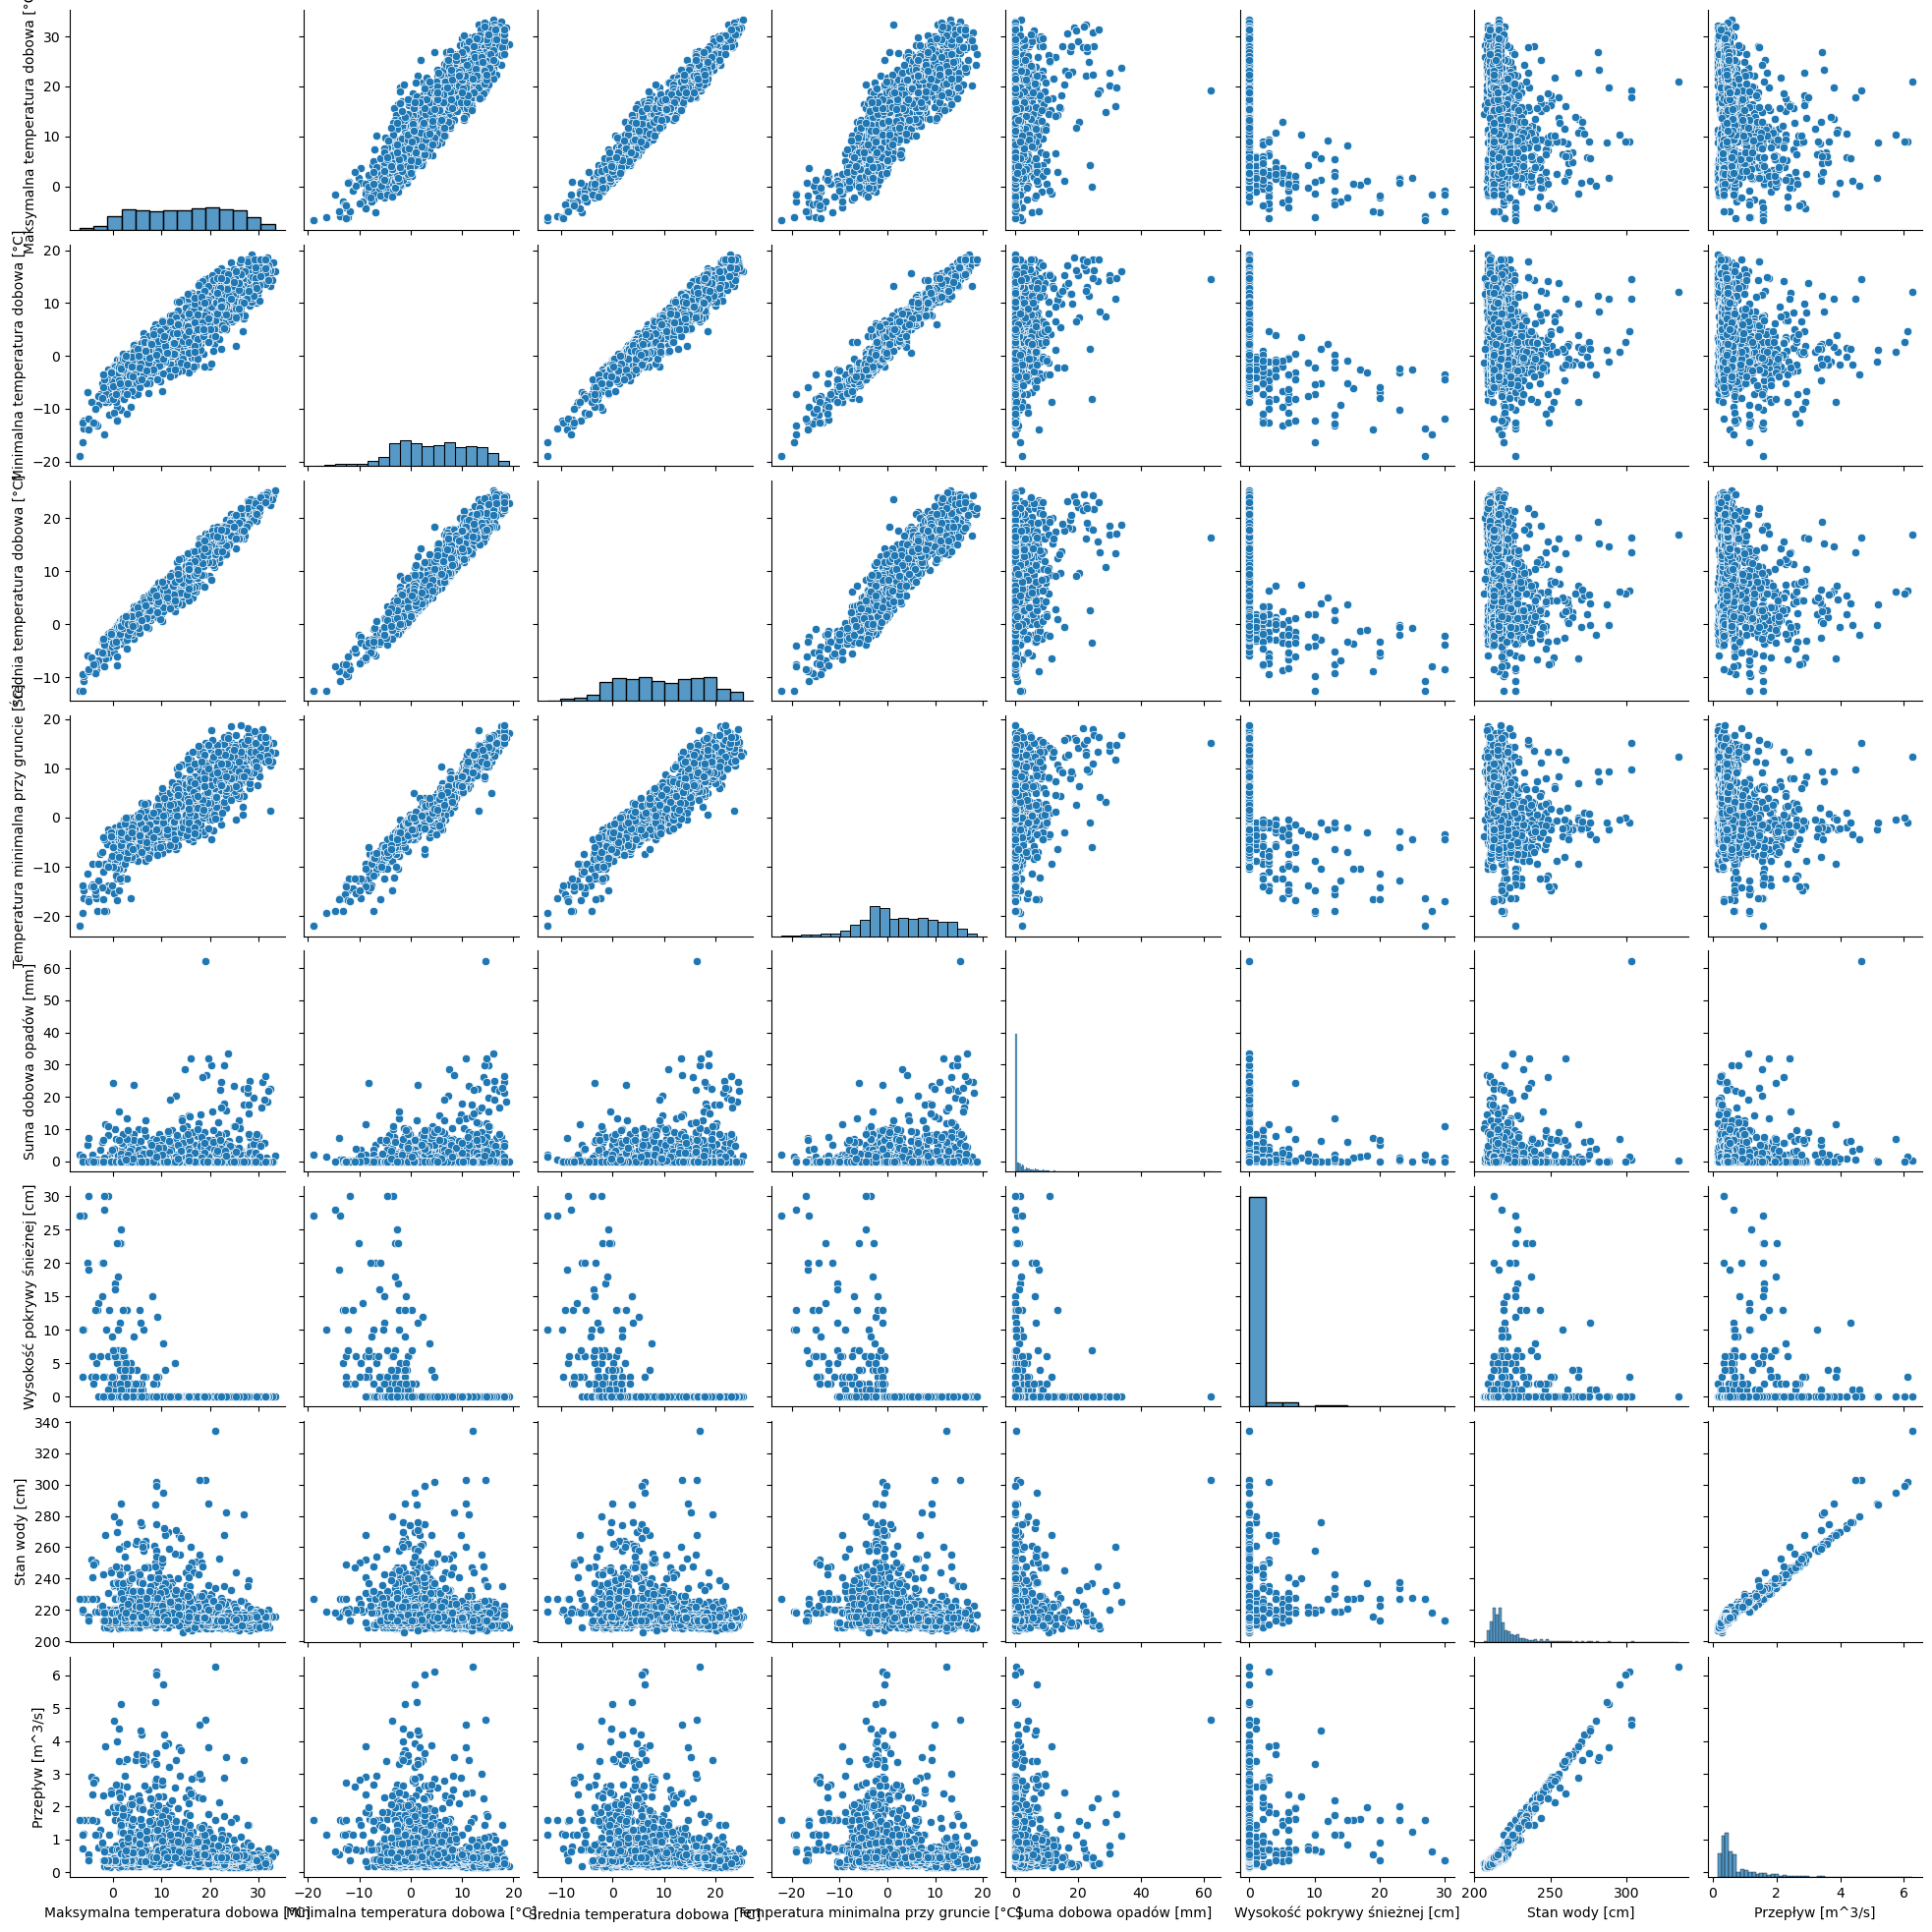

In [56]:
sns.pairplot(data)
plt.show()

In [80]:
corr = data.corr(numeric_only=True, method='pearson') #domyślnie korelacja Pearsona
print(corr)

                                         Maksymalna temperatura dobowa [°C]  \
Maksymalna temperatura dobowa [°C]                                 1.000000   
Minimalna temperatura dobowa [°C]                                  0.893886   
Średnia temperatura dobowa [°C]                                    0.977473   
Temperatura minimalna przy gruncie [°C]                            0.853606   
Suma dobowa opadów [mm]                                            0.090323   
Wysokość pokrywy śnieżnej [cm]                                    -0.374654   
Stan wody [cm]                                                    -0.272303   
Przepływ [m^3/s]                                                  -0.334806   

                                         Minimalna temperatura dobowa [°C]  \
Maksymalna temperatura dobowa [°C]                                0.893886   
Minimalna temperatura dobowa [°C]                                 1.000000   
Średnia temperatura dobowa [°C]                       

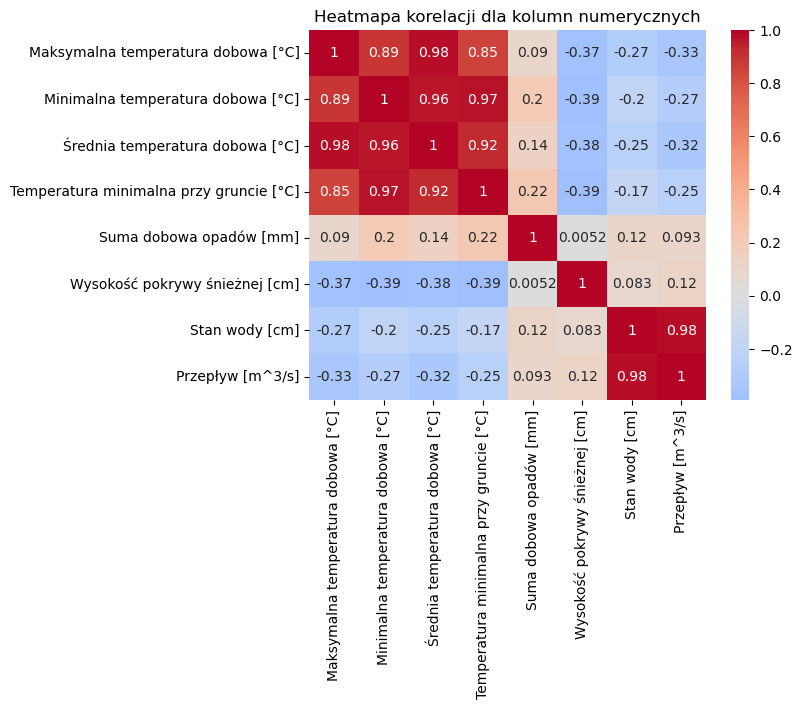

In [81]:
sns.heatmap(corr, cmap="coolwarm", annot=True, center=0)
plt.title('Heatmapa korelacji dla kolumn numerycznych')
plt.show()

In [76]:
num_df = data.select_dtypes(include='number') #wybór tylko kolmn numerycznych
num_df.columns

Index(['Maksymalna temperatura dobowa [°C]',
       'Minimalna temperatura dobowa [°C]', 'Średnia temperatura dobowa [°C]',
       'Temperatura minimalna przy gruncie [°C]', 'Suma dobowa opadów [mm]',
       'Wysokość pokrywy śnieżnej [cm]', 'Stan wody [cm]', 'Przepływ [m^3/s]'],
      dtype='object')

In [78]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd

# standaryzacja
scaler = StandardScaler()
X_scaled = scaler.fit_transform(num_df)

# PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# ładunki (komponenty)
loadings = pd.DataFrame(pca.components_.T, 
                        columns=[f'PC{i+1}' for i in range(X_scaled.shape[1])], 
                        index=num_df.columns)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
Maksymalna temperatura dobowa [°C],-0.456079,0.076065,-0.060350,0.184715,0.669899,-0.275237,0.000964,-0.473206
Minimalna temperatura dobowa [°C],-0.462428,0.158593,0.022948,0.124942,-0.343188,0.694036,0.082358,-0.372324
Średnia temperatura dobowa [°C],-0.469877,0.111406,-0.022617,0.175865,0.256362,0.187499,-0.026014,0.796122
Temperatura minimalna przy gruncie [°C],-0.452332,0.174055,0.029994,0.094582,-0.591932,-0.626505,-0.108736,0.023240
Suma dobowa opadów [mm],-0.077850,0.280675,0.833934,-0.454182,0.115751,-0.002911,-0.004804,0.002052
Wysokość pokrywy śnieżnej [cm],0.230084,-0.080840,0.503694,0.828038,-0.028934,-0.013865,0.008217,-0.008645
Stan wody [cm],0.199697,0.661216,-0.151149,0.093553,0.013019,-0.084998,0.694557,0.038896
Przepływ [m^3/s],0.232132,0.635480,-0.149735,0.098566,0.054297,0.086427,-0.705844,-0.038852


In [ ]:
pca.explained_variance_ratio_

## ZAMIANA JEDNOSTEK (do usunięcia? BO JEST W KROKU Z MODELEM)

In [6]:
type(data["Przepływ [m^3/s]"][0])

numpy.float64

In [7]:
data["Suma dobowa opadów [cm]"] = data["Suma dobowa opadów [mm]"].apply(lambda x: x*0.1 ) 

C:\Users\kinga\AppData\Local\Temp\ipykernel_16888\695857468.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Suma dobowa opadów [cm]"] = data["Suma dobowa opadów [mm]"].apply(lambda x: x*0.1 )


In [8]:
data["Przepływ [cm^3/s]"] = data["Przepływ [m^3/s]"].apply(lambda x: x*100**3)

C:\Users\kinga\AppData\Local\Temp\ipykernel_16888\1957071513.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Przepływ [cm^3/s]"] = data["Przepływ [m^3/s]"].apply(lambda x: x*100**3)


In [9]:
data.head()

,Nazwa stacji,Data,Maksymalna temperatura dobowa [°C],Minimalna temperatura dobowa [°C],Średnia temperatura dobowa [°C],Temperatura minimalna przy gruncie [°C],Suma dobowa opadów [mm],Rodzaj opadu [S/W/],Wysokość pokrywy śnieżnej [cm],Nazwa rzeki/jeziora,Stan wody [cm],Przepływ [m^3/s],Temperatura wody [st. C],Suma dobowa opadów [cm],Przepływ [cm^3/s]
19591,BORUCINO,2020-11-01,7.8,4.8,6.1,4.7,1.3,W,0,Borucinka (4868114),251,0.100,99.9,0.13,1.000000e+05
19109,KROŚCIENKO,2020-11-01,11.5,0.7,4.6,0.0,0.0,NaN,0,Dunajec (214),193,31.700,9.0,0.00,3.170000e+07
19589,BORUCINO,2020-11-01,7.8,4.8,6.1,4.7,1.3,W,0,Jez. Raduńskie Górne (4868119),488,99999.999,9.9,0.13,1.000000e+11
19440,RADZYŃ,2020-11-01,12.1,7.1,9.3,7.5,1.3,W,0,Radzyńska Struga (15614),118,99999.999,99.9,0.13,1.000000e+11
19439,RADZYŃ,2020-11-01,12.1,7.1,9.3,7.5,1.3,W,0,Jez. Sławskie (15619),190,99999.999,11.5,0.13,1.000000e+11


In [10]:
data_pszczyna = data[(data["Nazwa stacji"] == 'PSZCZYNA')]

In [11]:
data_pszczyna["Data"].head(10)

19019   2020-11-01
19020   2020-11-02
19021   2020-11-03
19022   2020-11-04
19023   2020-11-05
19024   2020-11-06
19025   2020-11-07
19026   2020-11-08
19027   2020-11-09
19028   2020-11-10
Name: Data, dtype: datetime64[ns]

In [12]:
data_pszczyna[(data_pszczyna["Data"] == '2021-01-01')]

,Nazwa stacji,Data,Maksymalna temperatura dobowa [°C],Minimalna temperatura dobowa [°C],Średnia temperatura dobowa [°C],Temperatura minimalna przy gruncie [°C],Suma dobowa opadów [mm],Rodzaj opadu [S/W/],Wysokość pokrywy śnieżnej [cm],Nazwa rzeki/jeziora,Stan wody [cm],Przepływ [m^3/s],Temperatura wody [st. C],Suma dobowa opadów [cm],Przepływ [cm^3/s]
0,PSZCZYNA,2021-01-01,0.7,-1.6,-0.6,-2.3,0.0,W,0,Pszczynka (2116),220,0.69,99.9,0.0,690000.0


### Dane w czasie 

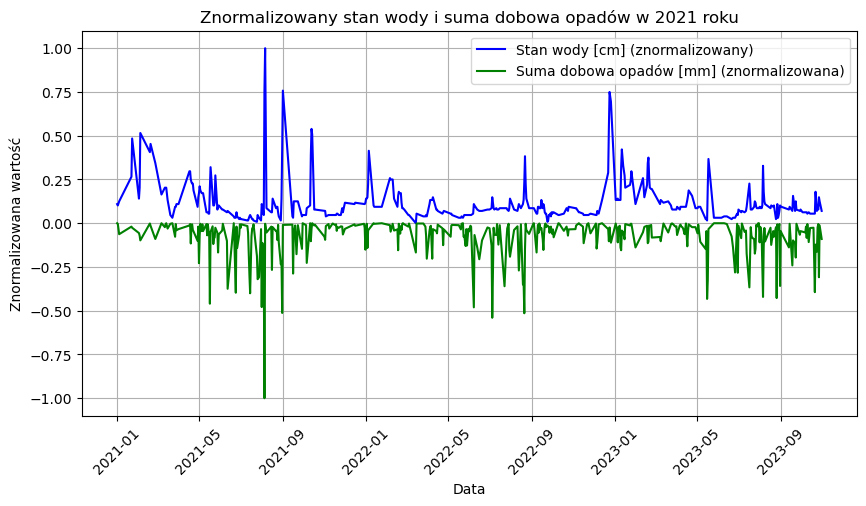

In [83]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Filtrowanie danych dla roku 2021
filtered_data = data[(data["Data"] >= '2021-01-01') & (data["Data"] <= '2023-12-31') &\
                             (data["Rodzaj opadu [S/W/]"] == "W")]

# Wybór kolumn do normalizacji
columns_to_normalize = ["Stan wody [cm]", "Suma dobowa opadów [mm]"]
scaler = MinMaxScaler()

# Normalizacja danych
normalized_values = scaler.fit_transform(filtered_data[columns_to_normalize])

# Tworzenie nowej ramki danych z normalizowanymi wartościami
normalized_data = filtered_data.copy()
normalized_data[columns_to_normalize] = normalized_values

# Tworzenie wykresu
plt.figure(figsize=(10, 5))

plt.plot(normalized_data["Data"], normalized_data["Stan wody [cm]"], label="Stan wody [cm] (znormalizowany)", color='b')
plt.plot(normalized_data["Data"], -normalized_data["Suma dobowa opadów [mm]"], label="Suma dobowa opadów [mm] (znormalizowana)", color='g')

# Dodanie etykiet, tytułu i legendy
plt.xlabel("Data")
plt.ylabel("Znormalizowana wartość")
plt.title("Znormalizowany stan wody i suma dobowa opadów w 2021 roku")
plt.legend()
plt.xticks(rotation=45)
plt.grid()

plt.show()


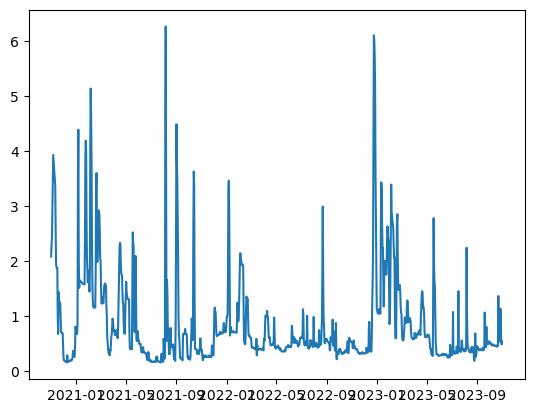

In [85]:
# plt.plot(data_pszczyna["Data"],\
#          data_pszczyna["Stan wody [cm]"])
plt.plot(data["Data"],\
         data["Przepływ [m^3/s]"])
plt.show()

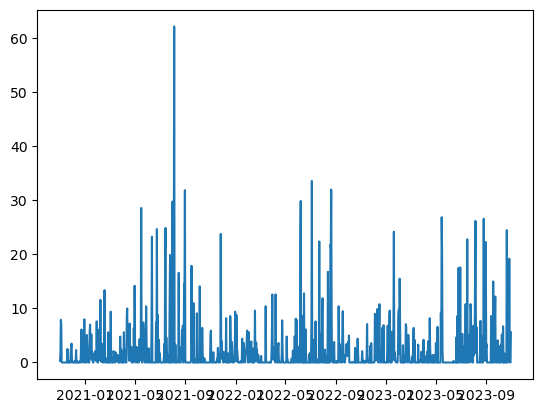

In [87]:
plt.plot(data["Data"],\
         data["Suma dobowa opadów [mm]"])
plt.show()

### Korelacje

In [22]:
data_pszczyna[data_pszczyna["Rodzaj opadu [S/W/]"] == "W"].corr(method="pearson")
# data_pszczyna.corr(method="pearson")

C:\Users\kinga\AppData\Local\Temp\ipykernel_16888\347164617.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_pszczyna[data_pszczyna["Rodzaj opadu [S/W/]"] == "W"].corr(method="pearson")


,Maksymalna temperatura dobowa [°C],Minimalna temperatura dobowa [°C],Średnia temperatura dobowa [°C],Temperatura minimalna przy gruncie [°C],Suma dobowa opadów [mm],Wysokość pokrywy śnieżnej [cm],Stan wody [cm],Przepływ [m^3/s],Temperatura wody [st. C],Suma dobowa opadów [cm],Przepływ [cm^3/s],Stan wody jutro [cm]
Maksymalna temperatura dobowa [°C],1.000000,0.884259,0.975163,0.832000,0.301912,-0.262563,-0.238547,-0.286893,NaN,0.301912,-0.286893,-0.217564
Minimalna temperatura dobowa [°C],0.884259,1.000000,0.955590,0.961207,0.368943,-0.266682,-0.152189,-0.215535,NaN,0.368943,-0.215535,-0.157565
Średnia temperatura dobowa [°C],0.975163,0.955590,1.000000,0.909423,0.336201,-0.266957,-0.210311,-0.265240,NaN,0.336201,-0.265240,-0.195293
Temperatura minimalna przy gruncie [°C],0.832000,0.961207,0.909423,1.000000,0.374199,-0.270761,-0.125983,-0.195591,NaN,0.374199,-0.195591,-0.142192
Suma dobowa opadów [mm],0.301912,0.368943,0.336201,0.374199,1.000000,-0.078087,0.120820,0.085694,NaN,1.000000,0.085694,0.301336
Wysokość pokrywy śnieżnej [cm],-0.262563,-0.266682,-0.266957,-0.270761,-0.078087,1.000000,0.210966,0.242988,NaN,-0.078087,0.242988,0.295847
Stan wody [cm],-0.238547,-0.152189,-0.210311,-0.125983,0.120820,0.210966,1.000000,0.983063,NaN,0.120820,0.983063,0.663781
Przepływ [m^3/s],-0.286893,-0.215535,-0.265240,-0.195591,0.085694,0.242988,0.983063,1.000000,NaN,0.085694,1.000000,0.675593
Temperatura wody [st. C],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Suma dobowa opadów [cm],0.301912,0.368943,0.336201,0.374199,1.000000,-0.078087,0.120820,0.085694,NaN,1.000000,0.085694,0.301336


korelacja stanu wody z sumą opadów z dnia poprzedniego

korelacja wzrosła z 11% na 30%

In [24]:
data_pszczyna['Stan wody jutro [cm]'] = data_pszczyna['Stan wody [cm]'].shift(-1)

# Usunięcie ostatniego wiersza, który teraz ma NaN w poziom_wody_tomorrow
data_pszczyna = data_pszczyna.dropna()

# Sprawdzenie korelacji między 'suma_opadów' a 'poziom_wody_tomorrow'
correlation = data_pszczyna[data_pszczyna["Rodzaj opadu [S/W/]"] == "W"][['Suma dobowa opadów [cm]', 'Stan wody jutro [cm]']].corr()
correlation

,Suma dobowa opadów [cm],Stan wody jutro [cm]
Suma dobowa opadów [cm],1.00000,0.30158
Stan wody jutro [cm],0.30158,1.00000


### Histogramy

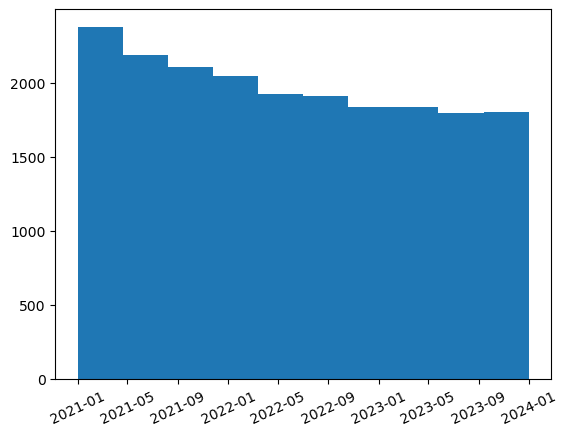

In [32]:
plt.hist(data["Data"])
plt.xticks(rotation = 25)
plt.show()

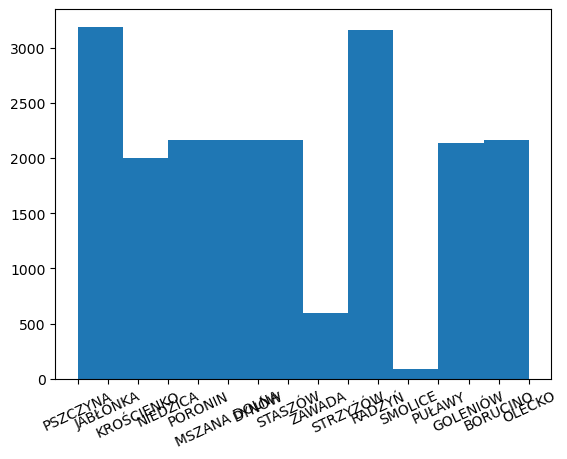

In [24]:
plt.hist(data["Nazwa stacji"])
plt.xticks(rotation = 25)
plt.show()

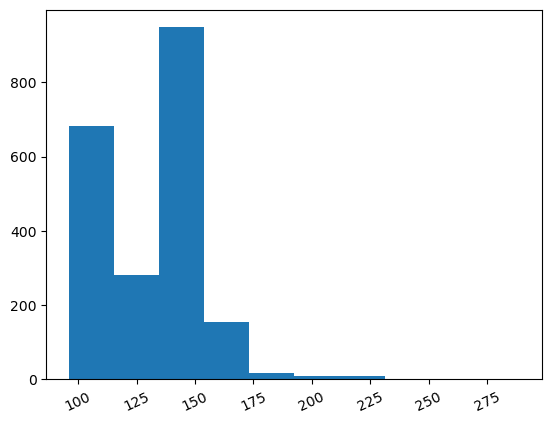

In [28]:
plt.hist(data["Stan wody [cm]"][data["Nazwa stacji"] == "JABŁONKA"])
plt.xticks(rotation = 25)
plt.show()

In [18]:
data[["Stan wody [cm]", "Suma dobowa opadów [cm]", "Przepływ [cm^3/s]"]][data["Nazwa stacji"] == "PSZCZYNA"].corr()

,Stan wody [cm],Suma dobowa opadów [cm],Przepływ [cm^3/s]
Stan wody [cm],1.000000,0.116965,0.981393
Suma dobowa opadów [cm],0.116965,1.000000,0.093391
Przepływ [cm^3/s],0.981393,0.093391,1.000000


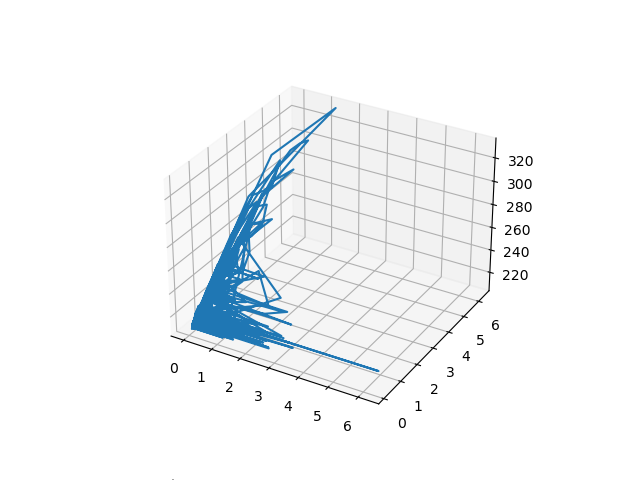

In [49]:
# import ipympl
# for creating a responsive plot 
%matplotlib widget 
  
# importing required libraries 
from mpl_toolkits.mplot3d import Axes3D 


fig = plt.figure()
 
# syntax for 3-D projection
ax = plt.axes(projection ='3d')

z = data["Stan wody [cm]"][data["Nazwa stacji"] == "PSZCZYNA"]
x = data["Suma dobowa opadów [cm]"][data["Nazwa stacji"] == "PSZCZYNA"]
y = data[ "Przepływ [cm^3/s]"][data["Nazwa stacji"] == "PSZCZYNA"]

ax.plot3D(x,y,z)
plt.show()

## Wybór stacji

In [19]:
data["Nazwa stacji"].unique()

array(['PSZCZYNA', 'JABŁONKA', 'KROŚCIENKO', 'NIEDZICA', 'PORONIN',
       'MSZANA DOLNA', 'DYNÓW', 'STASZÓW', 'ZAWADA', 'STRZYŻÓW', 'RADZYŃ',
       'SMOLICE', 'PUŁAWY', 'GOLENIÓW', 'BORUCINO', 'OLECKO'],
      dtype=object)

In [21]:
data_pszczyna = data[data["Nazwa stacji"] == "PSZCZYNA"]
data_pszczyna.shape

(1083, 15)

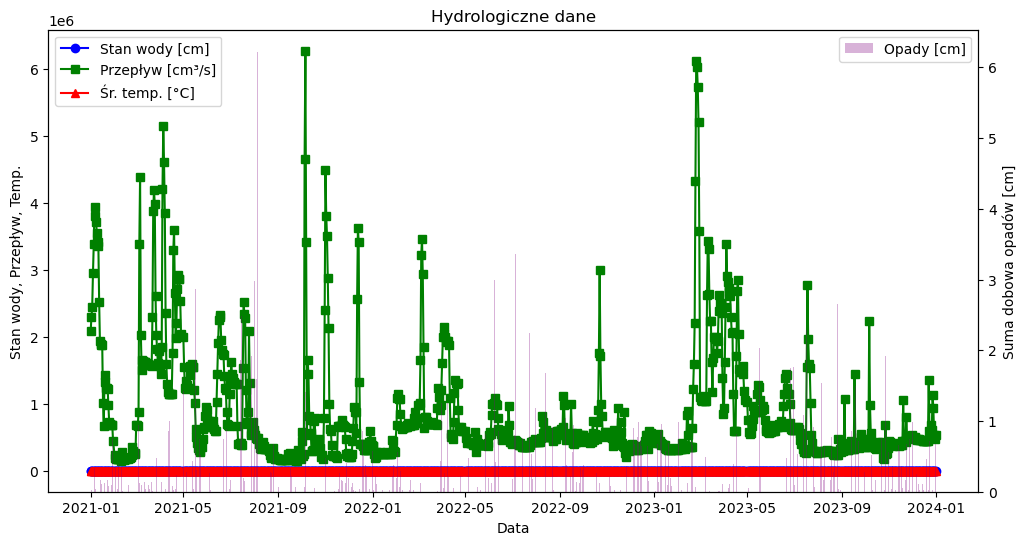

In [21]:
import matplotlib.pyplot as plt

# Tworzymy wykres
fig, ax1 = plt.subplots(figsize=(12, 6))

# Wykres linii dla 'Stan wody [cm]', 'Przepływ [m^3/s]', 'Średnia temperatura'
ax1.plot(data_pszczyna['Data'], data_pszczyna['Stan wody [cm]'], label='Stan wody [cm]', color='blue', marker='o')
ax1.plot(data_pszczyna['Data'], data_pszczyna['Przepływ [cm^3/s]'], label='Przepływ [cm³/s]', color='green', marker='s')
ax1.plot(data_pszczyna['Data'], data_pszczyna['Średnia temperatura dobowa [°C]'], label='Śr. temp. [°C]', color='red', marker='^')

# Druga oś Y dla opadów
ax2 = ax1.twinx()
ax2.bar(data_pszczyna['Data'], data_pszczyna['Suma dobowa opadów [cm]'], label='Opady [cm]', color='purple', alpha=0.3, width=0.6)

# Dodajemy etykiety
ax1.set_xlabel('Data')
ax1.set_ylabel('Stan wody, Przepływ, Temp.')
ax2.set_ylabel('Suma dobowa opadów [cm]')

# Legenda
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Formatowanie dat na osi X
plt.xticks(rotation=45)
plt.title('Hydrologiczne dane')

# Pokaż wykres
plt.show()


C:\Users\kinga\AppData\Local\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 14s 41ms/step - loss: 48509.5703 - mae: 219.9091 - val_loss: 47784.9336 - val_mae: 218.1522
Epoch 2/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 46827.0859 - mae: 216.0577 - val_loss: 43286.4414 - val_mae: 207.7448
Epoch 3/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 41093.8047 - mae: 202.4351 - val_loss: 33251.2148 - val_mae: 181.8818
Epoch 4/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 30374.5020 - mae: 173.5506 - val_loss: 18956.4922 - val_mae: 135.5204
Epoch 5/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 16316.4580 - mae: 125.0370 - val_loss: 7026.7329 - val_mae: 79.4366
Epoch 6/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 5649.3774 - mae: 70.4052 - val_loss: 2192.2966 - val_mae: 40.1417
Epoch 7/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 1974.2839 - mae: 36.9426 - val_loss: 1364.3030 - val_mae: 27.5808
Epoch 8/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 1416.6614 - mae: 26.8715 - val_loss: 1195.8597 

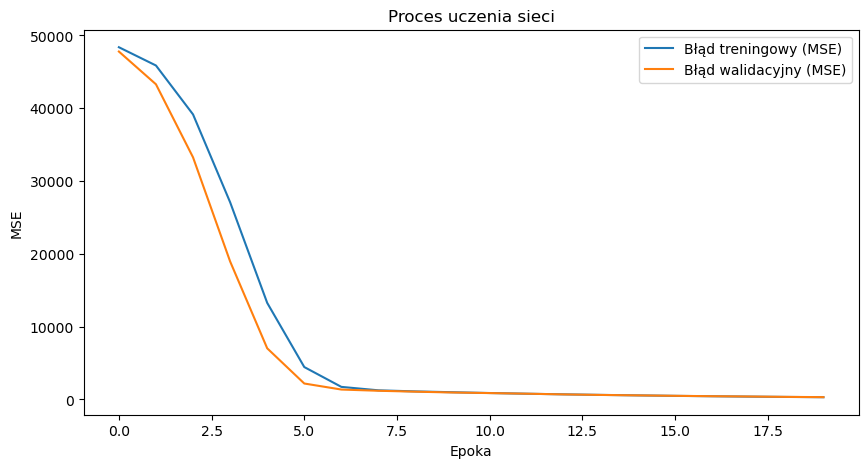

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step


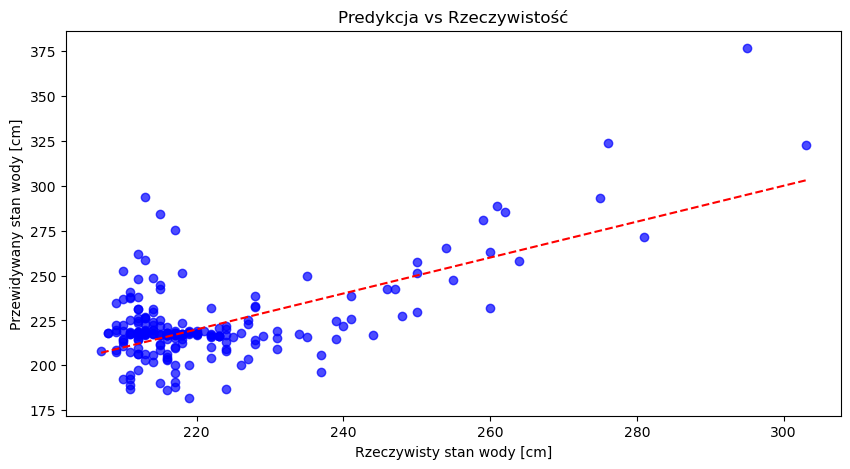

In [22]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Załaduj dane
df = data_pszczyna.copy()

# Konwersja 'Data' na datetime, jeśli jeszcze nie jest
df['Data'] = pd.to_datetime(df['Data'])

# Wybór cech (X) i etykiety (y)
X = df[['Przepływ [cm^3/s]', 'Suma dobowa opadów [cm]', 'Średnia temperatura dobowa [°C]']]
y = df['Stan wody [cm]']

# Podział na zbiór treningowy i testowy (80% - trening, 20% - test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standaryzacja danych (skalowanie do N(0,1))
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Tworzenie modelu sieci neuronowej (MLP)
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # Warstwa ukryta 1
    keras.layers.Dense(32, activation='relu'),  # Warstwa ukryta 2
    keras.layers.Dense(1)  # Warstwa wyjściowa (1 neuron, regresja)
])

# Kompilacja modelu
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Trening modelu
history = model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=20, batch_size=16, verbose=1)

# Wizualizacja błędu
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Błąd treningowy (MSE)')
plt.plot(history.history['val_loss'], label='Błąd walidacyjny (MSE)')
plt.xlabel('Epoka')
plt.ylabel('MSE')
plt.legend()
plt.title('Proces uczenia sieci')
plt.show()

# Predykcja na danych testowych
y_pred = model.predict(X_test_scaled)

# Wizualizacja wyników predykcji vs rzeczywiste wartości
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='dashed')  # Linia idealnych predykcji
plt.xlabel('Rzeczywisty stan wody [cm]')
plt.ylabel('Przewidywany stan wody [cm]')
plt.title('Predykcja vs Rzeczywistość')
plt.show()